## Final Project

### 0. Import libraries

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

### 1. Loading data

In [39]:
# Read the csv file
data = pd.read_csv('../data/clean_data/clean_data.csv')
data.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [40]:
data.shape

(174, 451)

### 2. Processing Data

In [183]:
# Separate features and target
X = data.drop(['class'], axis=1)

# Save original column names
columns_names = X.columns

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=columns_names)

# Attach the target column back
df_scaled['class'] = data['class']

df_scaled.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,-0.039958,0.819201,-0.964281,-1.021048,-0.621190,-0.331301,-0.143336,0.583446,-1.097797,-0.210827,...,-0.110468,1.905814,0.750685,0.368053,-0.541445,-0.157047,0.370324,2.347146,-0.039552,1
1,3.670803,1.863195,-0.994191,-1.051635,-0.172774,-0.149357,-0.377846,-0.541698,-1.131393,-0.371903,...,-1.589980,-0.657467,-1.874750,-2.259487,1.574847,4.390919,-0.386182,2.040903,0.271310,1
2,-0.242853,0.162976,-0.369289,-0.249241,0.216015,-0.697480,-0.077097,0.023550,-0.360783,-0.044734,...,0.482173,-1.159080,-0.315186,-0.563403,-0.431982,0.124509,-0.613046,-0.329030,-0.171900,1
3,-0.280104,0.162976,0.391119,-0.155526,-0.135051,0.382725,0.369034,-0.237507,0.205663,0.306488,...,-0.554289,-0.031154,-0.177609,-1.479491,1.355920,1.304574,-0.506614,1.184202,0.034342,1
4,-0.265837,-0.863121,-0.216284,-0.801634,-0.602937,-1.187857,-0.394751,-0.538220,-0.487082,-0.402728,...,-0.427298,0.394214,-0.770566,-1.400574,0.224798,-0.305967,0.656282,-0.084184,-0.184917,1


### 3. K-Nearest Neighbors (KNN) Classifier Model

In [145]:
#Train test split

y = df_scaled['class']
X = df_scaled.drop(['class'], axis=1)
print(y.shape, X.shape)

(174,) (174, 450)


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130, 450), (44, 450), (130,), (44,))

In [147]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [148]:
y_train_pred = model.predict(X_train)
score_train = model.score(X_train, y_train)
score_train

0.7153846153846154

In [149]:
y_pred_test = model.predict(X_test)
score_test = model.score(X_test, y_test)
score_test

0.7045454545454546

#### - Accuracy score vs number of K

In [150]:
scores = []
for k in range(2,15):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [151]:
print(scores)

[0.6136363636363636, 0.6363636363636364, 0.5909090909090909, 0.6363636363636364, 0.6136363636363636, 0.7045454545454546, 0.6818181818181818, 0.6818181818181818, 0.6590909090909091, 0.6818181818181818, 0.6363636363636364, 0.6590909090909091, 0.6363636363636364]


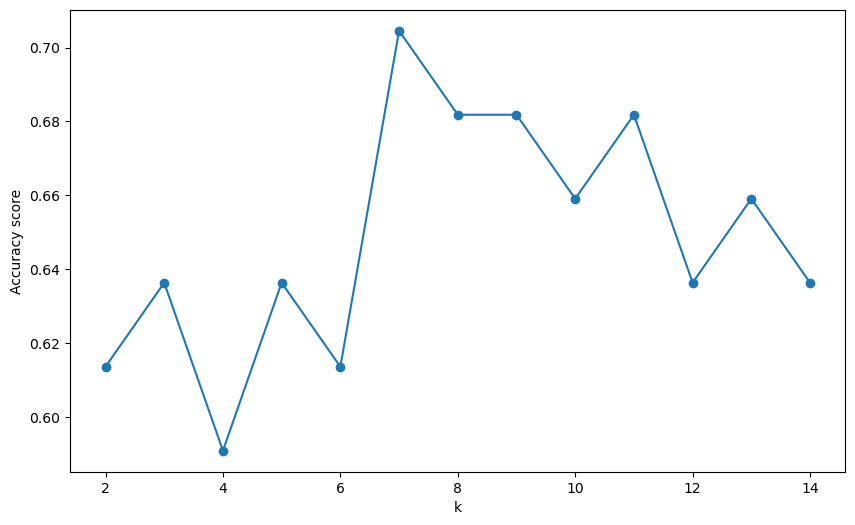

In [152]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

#### - Mean squared error vs number of K

In [153]:
# Elbow method using MSE as error metric (lower MSE -> better model)

from sklearn.metrics import mean_squared_error

MSEs = []

for k in range(2,15):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [154]:
print(MSEs)

[0.38636363636363635, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365, 0.38636363636363635, 0.29545454545454547, 0.3181818181818182, 0.3181818181818182, 0.3409090909090909, 0.3181818181818182, 0.36363636363636365, 0.3409090909090909, 0.36363636363636365]


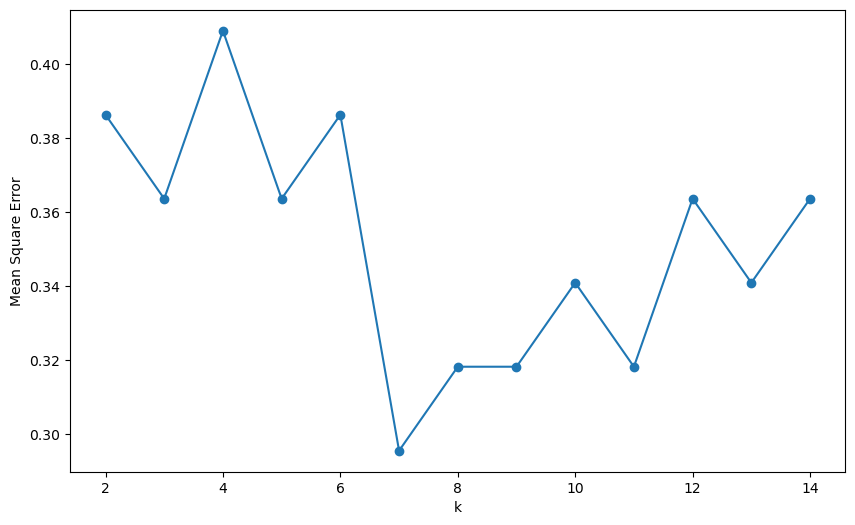

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

#### - Recall score vs number of K

In [173]:
recall_scores = []
for k in range(2, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred)
    recall_scores.append(score)

In [175]:
print(recall_scores)

[0.2608695652173913, 0.30434782608695654, 0.21739130434782608, 0.34782608695652173, 0.30434782608695654, 0.4782608695652174, 0.391304347826087, 0.391304347826087, 0.34782608695652173, 0.391304347826087, 0.30434782608695654, 0.34782608695652173, 0.30434782608695654]


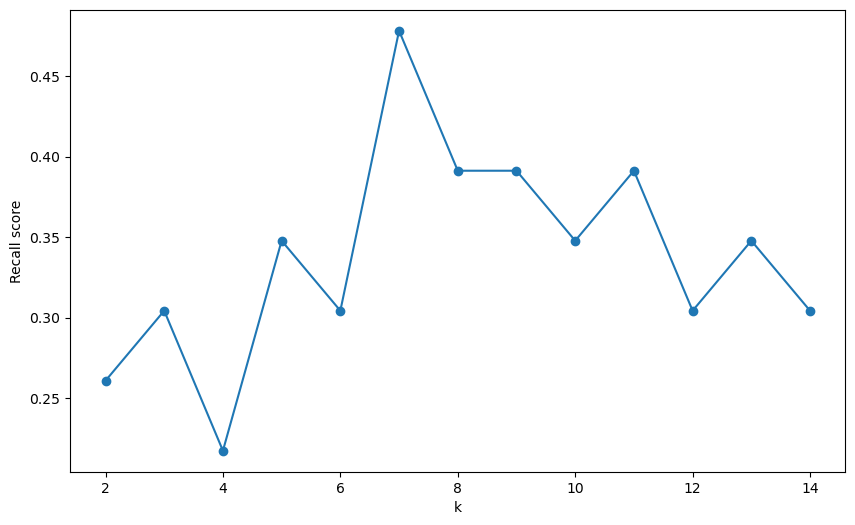

In [174]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), recall_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Recall score')
plt.show()

#### - Evaluation of the model with confusion matrix

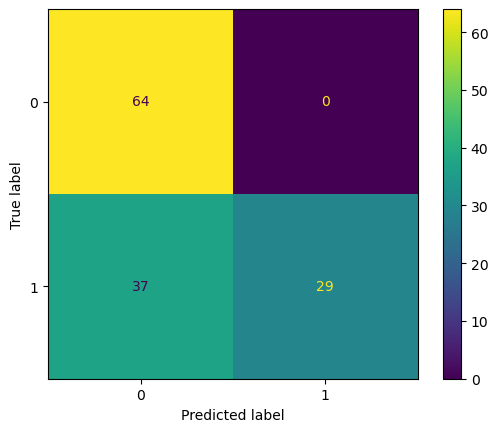

In [156]:
#Display confusion matrix for train data
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=model.classes_)
disp.plot()
plt.show()

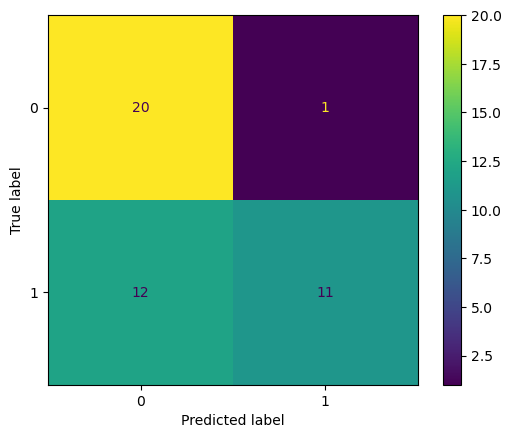

In [157]:
#Now for test
cm_train = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm_train, display_labels=model.classes_)
disp.plot()
plt.show()

In [158]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.70
The precision in the TEST set is: 0.92
The recall in the TEST set is: 0.48
The F1 in the TEST set is: 0.63
The Kappa in the TEST set is: 0.42


### 4. Improving the model

In [177]:
# Create a function to test multiple times the Knn classifier, trying to improve the metrics with different modifications

def KNN_classifier_model(df):
    y = df['class']
    X = df.drop(['class'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    cm_test = confusion_matrix(y_test,y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp.plot()
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    kappa = cohen_kappa_score(y_test, y_pred_test)
    
    result = f'''
    The accuracy in the TEST set is: {accuracy:.2f}
    The precision in the TEST set is: {precision:.2f}
    The recall in the TEST set is: {recall:.2f}
    The F1 in the TEST set is: {f1:.2f}
    The Kappa in the TEST set is: {kappa:.2f}
    '''

    for line in result.split('\n'):
        print(line)

#### 4.1 High correlated columns removal (hr)

In [204]:
# Calculate correlation matrix
correlation_matrix = df_scaled.corr()

# Set a correlation threshold
correlation_threshold = 0.85

# Identify highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

# Create a set to keep track of features to remove
features_to_remove = set()

# Loop through the pairs and decide which features to remove
for feature1, feature2 in zip(*highly_correlated_pairs):
    if feature1 != feature2 and feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Convert indices to column labels
columns_to_remove = [df_scaled.columns[idx] for idx in features_to_remove]
print(len(columns_to_remove))

76


In [205]:
hr_df = df_scaled.drop(columns=columns_to_remove)
hr_df.shape

(174, 375)


    The accuracy in the TEST set is: 0.70
    The precision in the TEST set is: 1.00
    The recall in the TEST set is: 0.43
    The F1 in the TEST set is: 0.61
    The Kappa in the TEST set is: 0.42
    


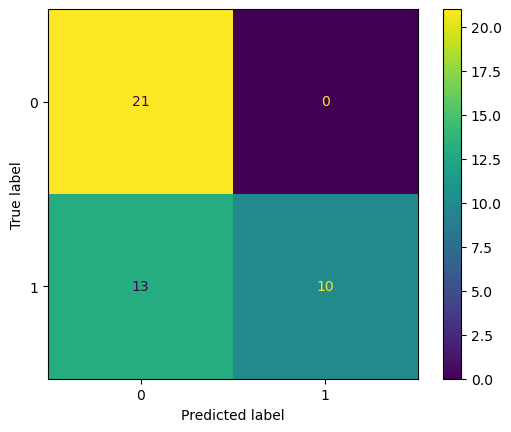

In [206]:
KNN_classifier_model(hr_df)

#### 4.2 Outliers imputation (oi)

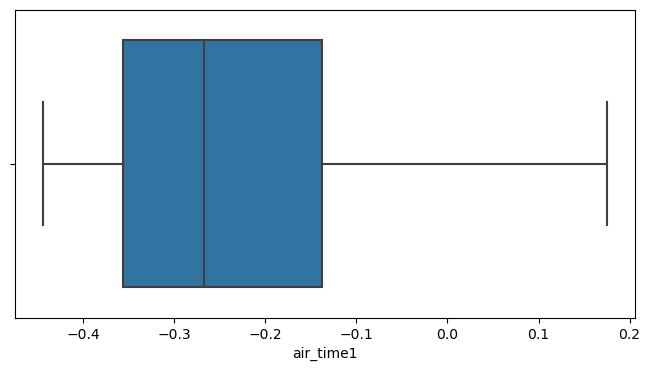

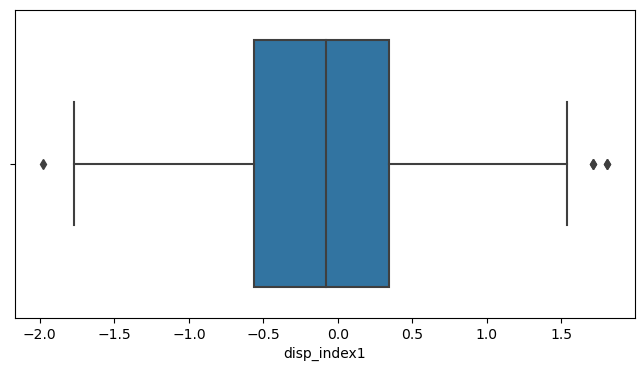

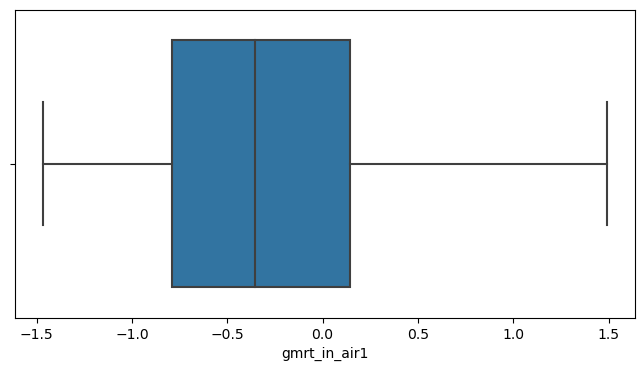

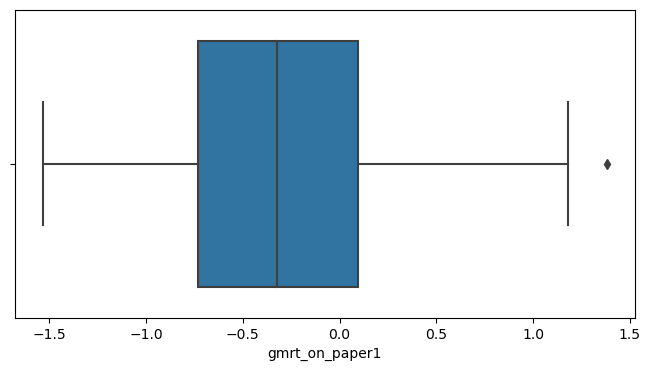

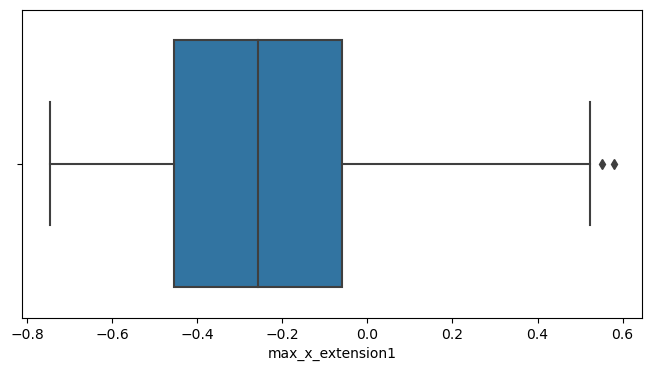

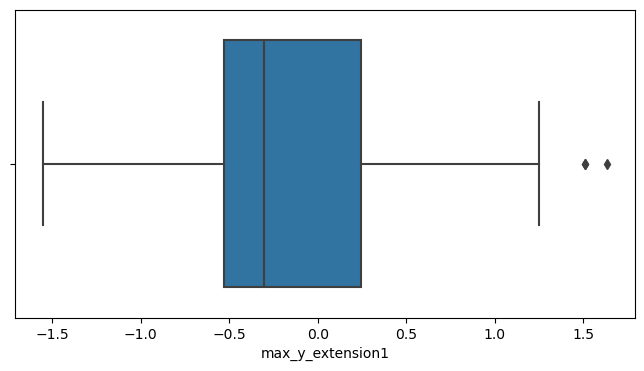

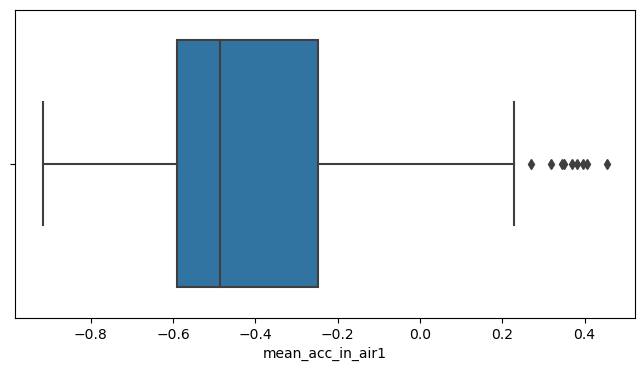

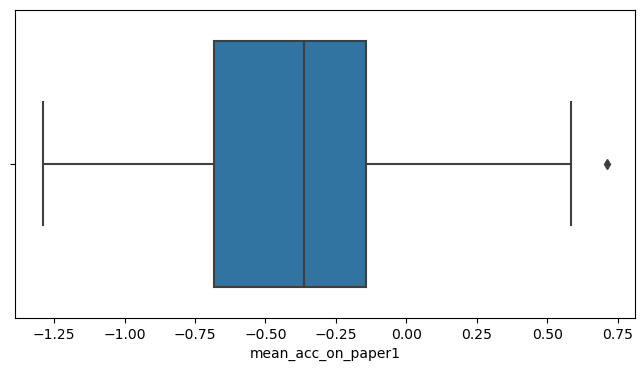

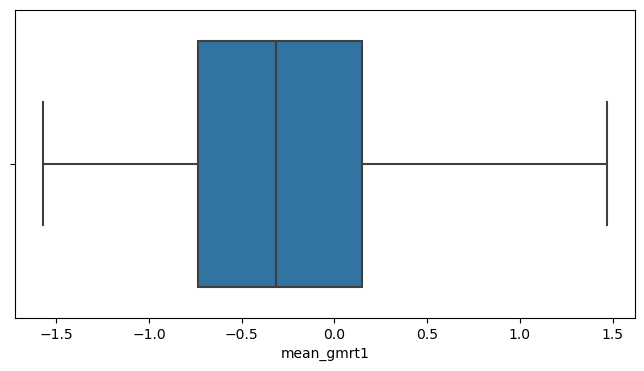

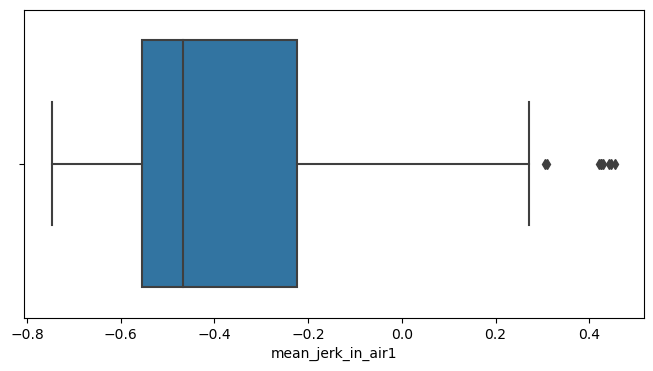

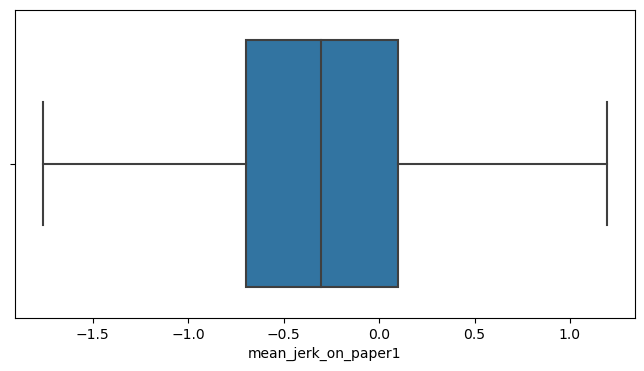

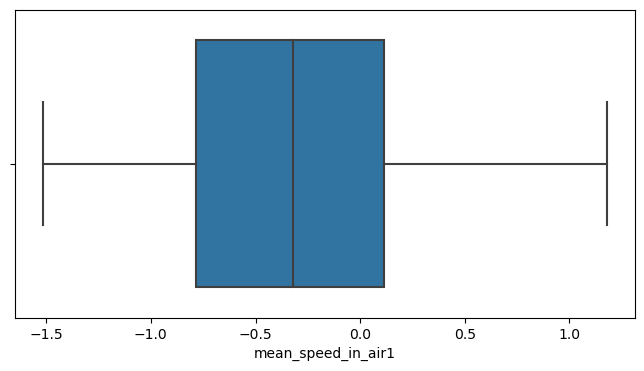

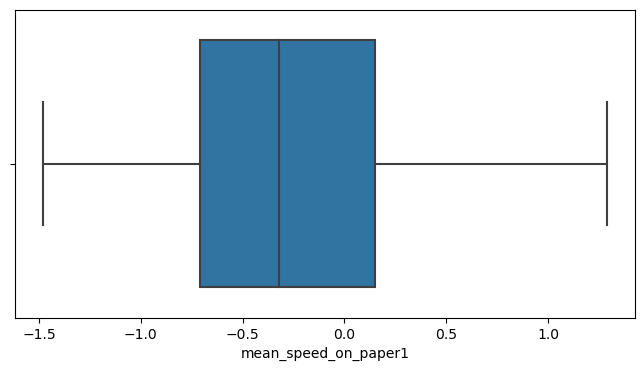

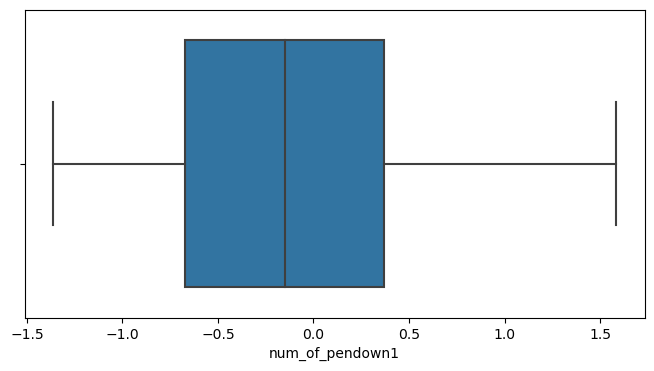

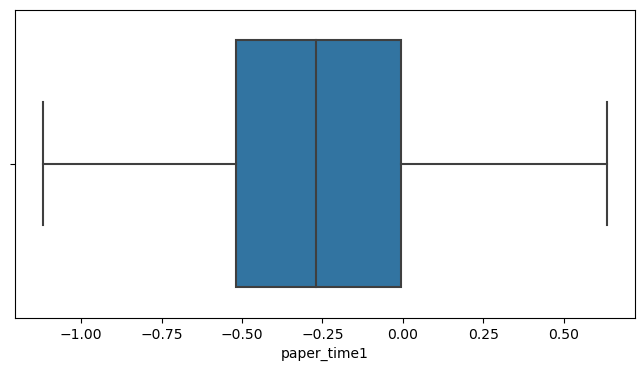

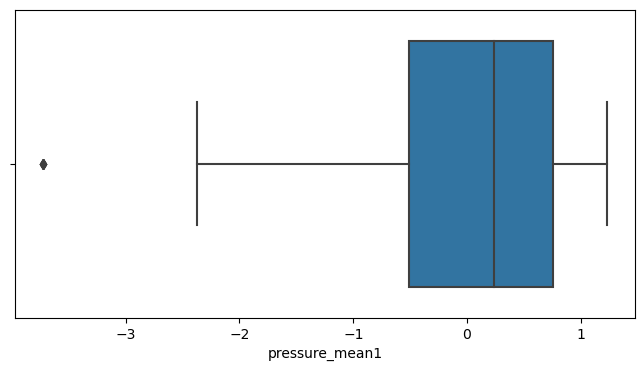

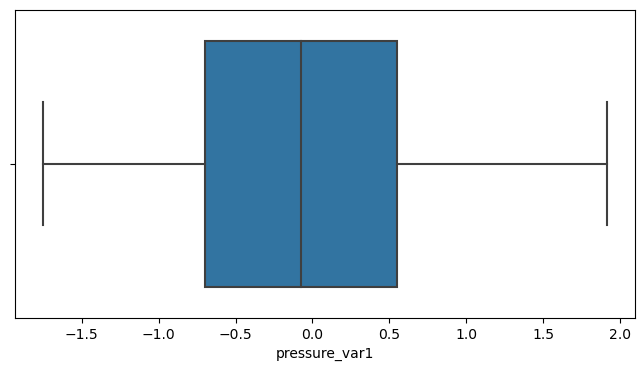

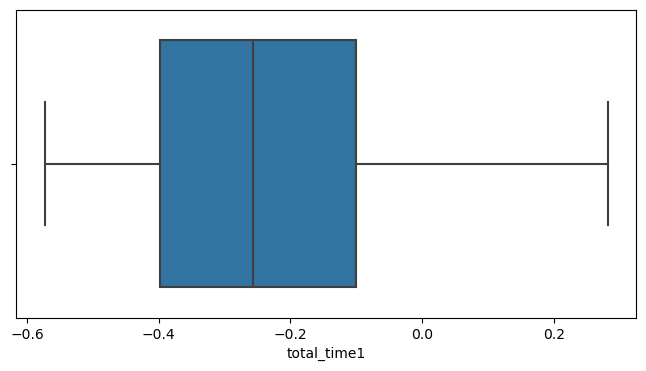

In [211]:
for column in df_scaled.columns[0:18]:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_scaled, x=column)
    plt.show()

In [214]:
# Create a copy to avoid make changes in the scaled dataframe
oi_df = df_scaled

In [215]:
outliers_index = {}  # A dictionary to store the indices of outliers for each column
modes = oi_df.mode().iloc[0]  # Calculate the mode for each column

# Using the mode to impute outliers may be more optimal, as it is less sensitive to these values, compared to using the mean.

# A for loop to find the interquantile range, the upper and lower limits, the indices for every each column, and impute outlier with the mode.
for column in oi_df.columns:
    q1 = np.percentile(oi_df[column], 25)  # Percentile 25
    q3 = np.percentile(oi_df[column], 75)  # Percentile 75
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Find and store the indices of outliers
    outliers_index[column] = oi_df[(oi_df[column] < lower_limit) | (oi_df[column] > upper_limit)].index
    
    # Impute outliers with the mode
    oi_df.loc[outliers_index[column], column] = modes[column]

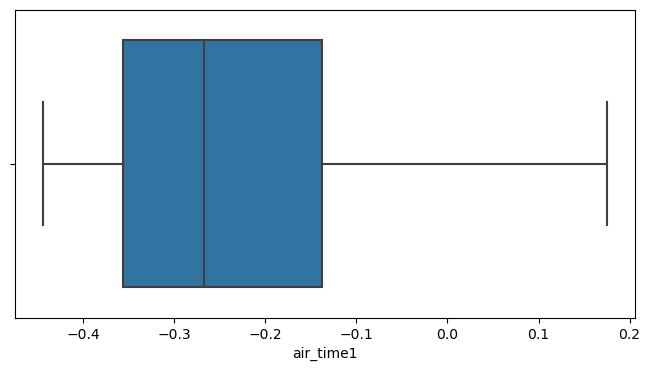

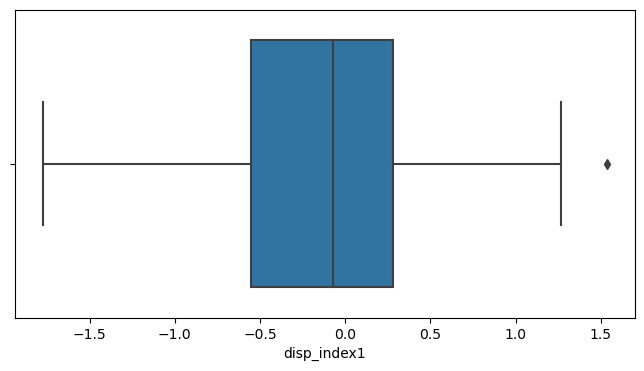

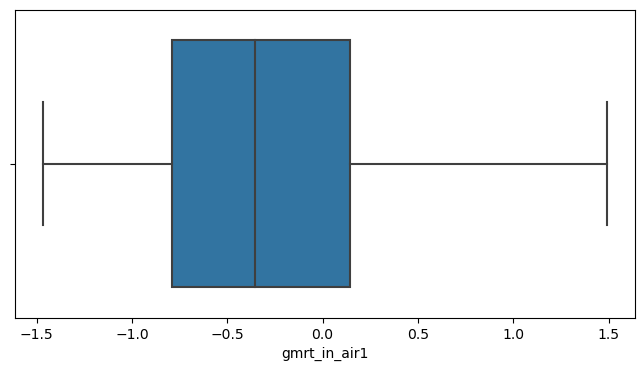

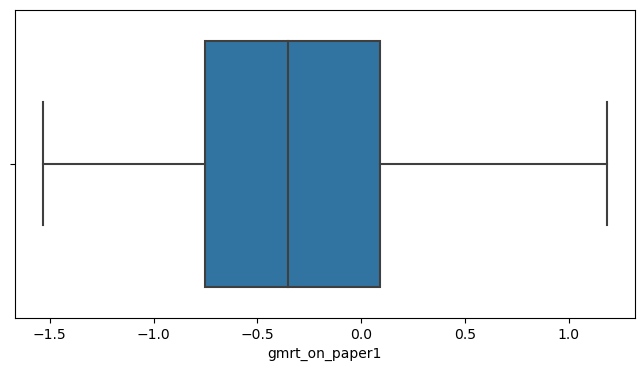

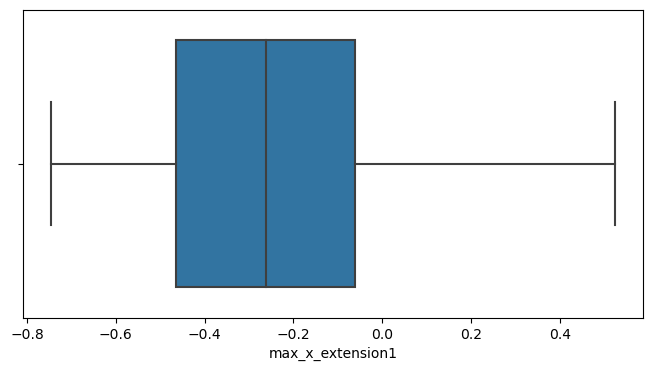

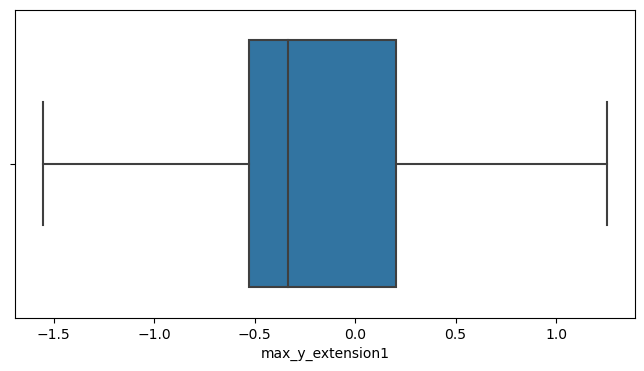

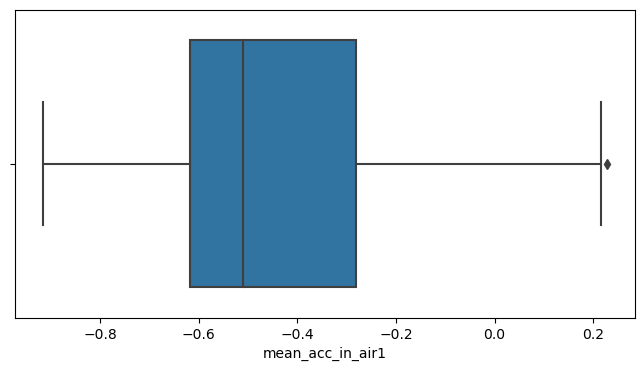

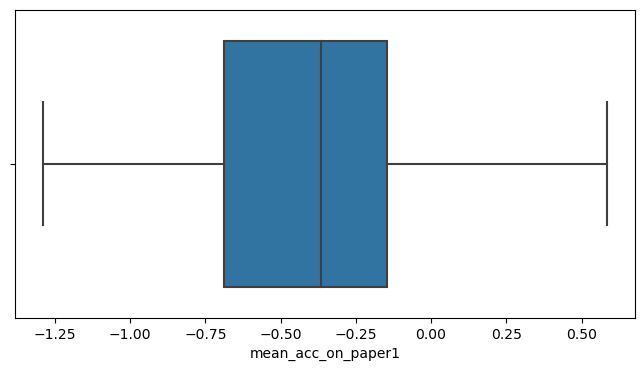

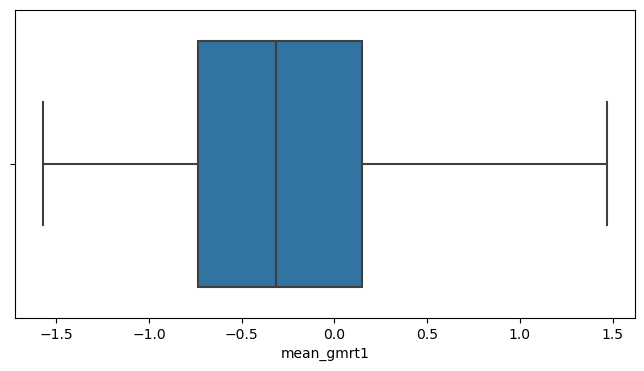

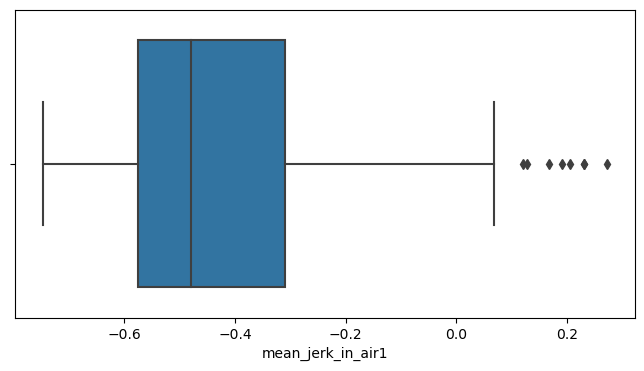

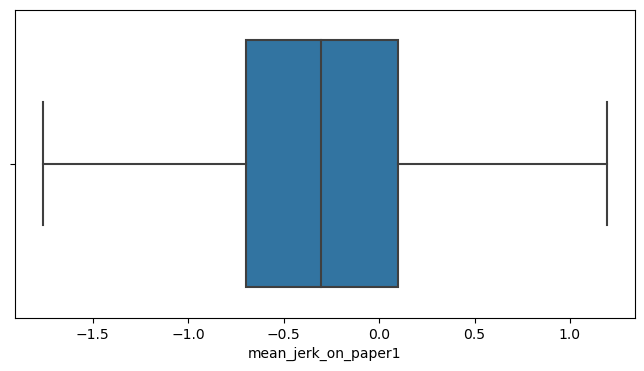

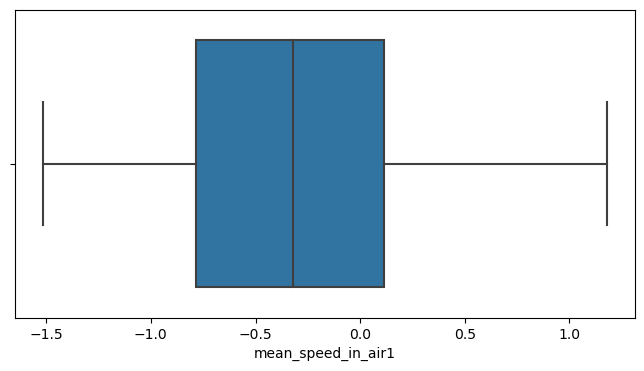

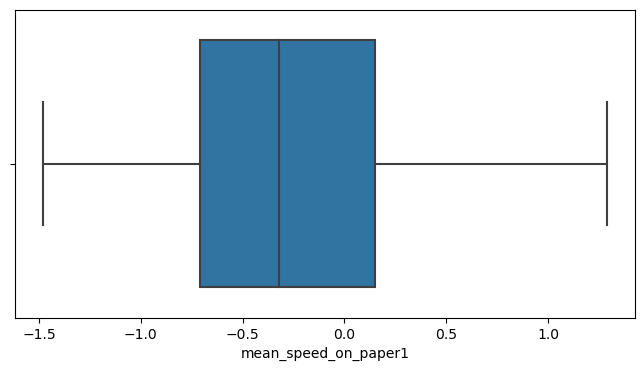

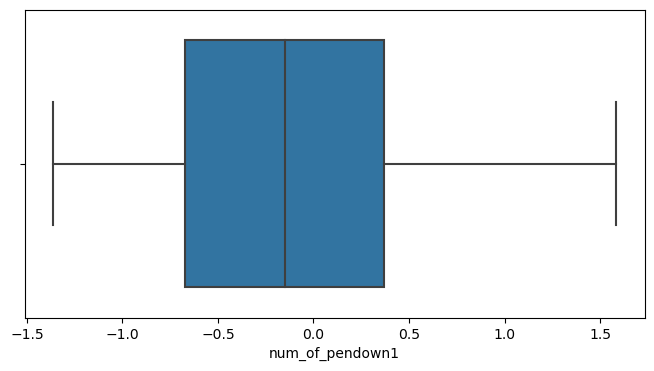

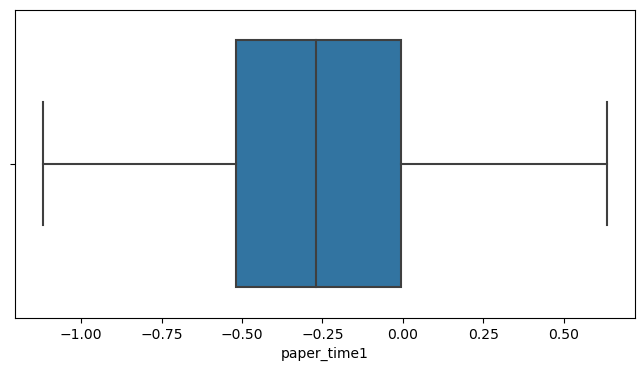

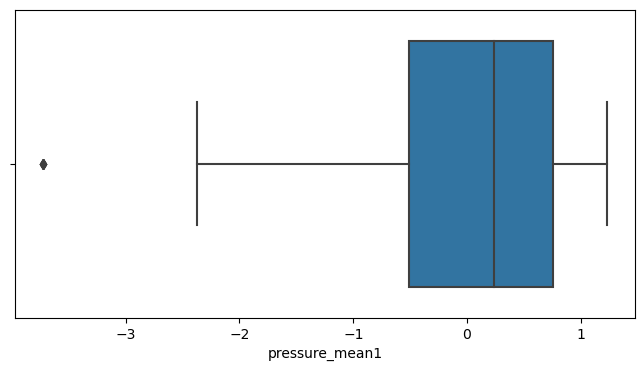

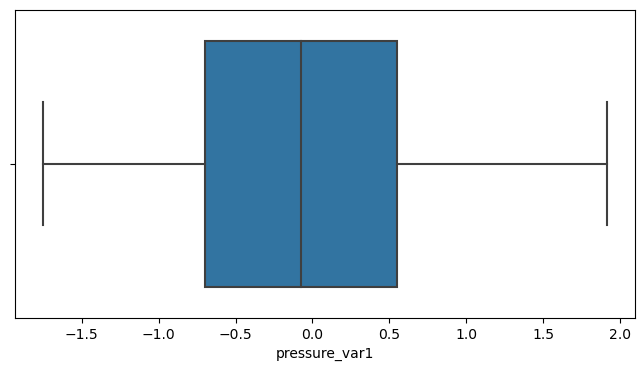

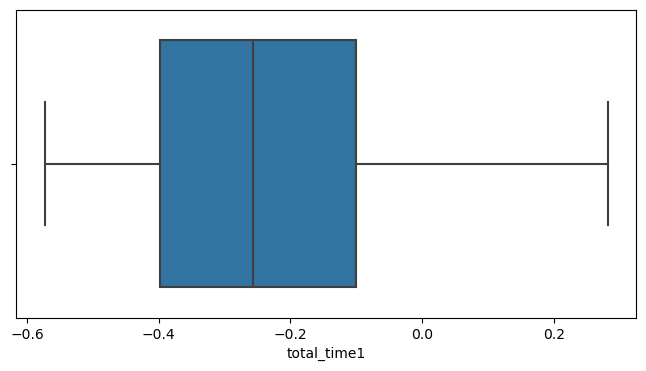

In [216]:
# Check the outliers with the boxplots.
for column in oi_df.columns[0:18]:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=oi_df, x=column)
    plt.show()


    The accuracy in the TEST set is: 0.75
    The precision in the TEST set is: 1.00
    The recall in the TEST set is: 0.52
    The F1 in the TEST set is: 0.69
    The Kappa in the TEST set is: 0.51
    


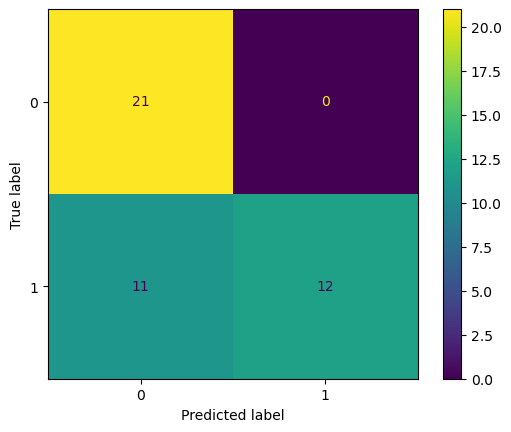

In [217]:
KNN_classifier_model(oi_df)

#### 4.3 Low variance columns removal (lr)

In [220]:
# Calculate variance for each feature
variances = oi_df.var()

# Set a threshold
threshold = 0.25

# Filter features with variance below the threshold
low_variance_features = variances[variances <= threshold].index
len(low_variance_features)

157

In [221]:
lr_df = oi_df.drop(columns=low_variance_features)
lr_df.shape

(174, 294)


    The accuracy in the TEST set is: 0.77
    The precision in the TEST set is: 1.00
    The recall in the TEST set is: 0.57
    The F1 in the TEST set is: 0.72
    The Kappa in the TEST set is: 0.55
    


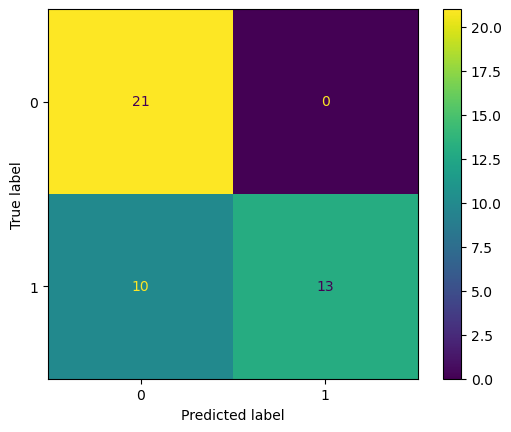

In [222]:
KNN_classifier_model(lr_df)

### 5. Conclusions